In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the provided Excel file to examine its contents
file_path = 'SAT7HL.xlsx'
xls = pd.ExcelFile(file_path)

# Check the sheet names to identify where the "Tidy" data is located
xls.sheet_names


# Load the 'Tidy' sheet to analyze the data
df_tidy = pd.read_excel(file_path, sheet_name='tidy')

# Display the first few rows of the dataset to understand its structure
df_tidy.head()

# Filter the data to only focus on 'FA' for the analysis
df_anova_fa = df_tidy[['Animal_ID', 'Phenotype', 'Block_Number', 'FA']].dropna()

# Convert the categorical variables to appropriate types
df_anova_fa['Block_Number'] = df_anova_fa['Block_Number'].astype('category')
df_anova_fa['Phenotype'] = df_anova_fa['Phenotype'].astype('category')

# Fit a linear mixed-effects model with 'Block_Number' as a repeated measure and 'Phenotype' as a fixed effect
# Random intercept for each 'Animal_ID'

# Create the linear mixed model formula for FA
formula_fa = "FA ~ Block_Number * Phenotype"

# Fit the model for FA
model_fa = mixedlm(formula_fa, df_anova_fa, groups=df_anova_fa['Animal_ID'])
mixed_model_fa = model_fa.fit()

# Summarize the results for FA
mixed_model_fa.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Mixed Linear Model Regression Results
================================================================================
Model:                     MixedLM         Dependent Variable:         FA       
No. Observations:          210             Method:                     REML     
No. Groups:                42              Scale:                      2.8892   
Min. group size:           5               Log-Likelihood:             -416.2051
Max. group size:           5               Converged:                  Yes      
Mean group size:           5.0                                                  
--------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                              2.375    0.679  3.498 0.000  1.044  3.706
Block_Number[T.Bloc2]                  0.375    0.850  0.441 0.659 -1.291  2.041
Block_Number[T.Bloc3]                  0.000    0.850  0.000 1.000 -1.666  1.666
Block_Number[T.Bloc4]                  0.375    0.850  0.441 0.659 -1.291  2.041
Block_Number[T.Bloc5]                  0.625    0.850  0.735 0.462 -1.041  2.291
Phenotype[T.IN]                       -0.458    0.877 -0.523 0.601 -2.176  1.260
Phenotype[T.ST]                        0.670    0.793  0.846 0.398 -0.884  2.224
Block_Number[T.Bloc2]:Phenotype[T.IN]  0.792    1.097  0.722 0.471 -1.359  2.942
Block_Number[T.Bloc3]:Phenotype[T.IN]  0.500    1.097  0.456 0.649 -1.650  2.650
Block_Number[T.Bloc4]:Phenotype[T.IN]  0.625    1.097  0.570 0.569 -1.525  2.775
Block_Number[T.Bloc5]:Phenotype[T.IN]  0.208    1.097  0.190 0.849 -1.942  2.359
Block_Number[T.Bloc2]:Phenotype[T.ST] -0.693    0.992 -0.698 0.485 -2.638  1.252
Block_Number[T.Bloc3]:Phenotype[T.ST] -0.318    0.992 -0.321 0.749 -2.263  1.627
Block_Number[T.Bloc4]:Phenotype[T.ST] -0.193    0.992 -0.195 0.846 -2.138  1.752
Block_Number[T.Bloc5]:Phenotype[T.ST] -0.625    0.992 -0.630 0.529 -2.570  1.320
Group Var                              0.799    0.205                           
================================================================================

"""

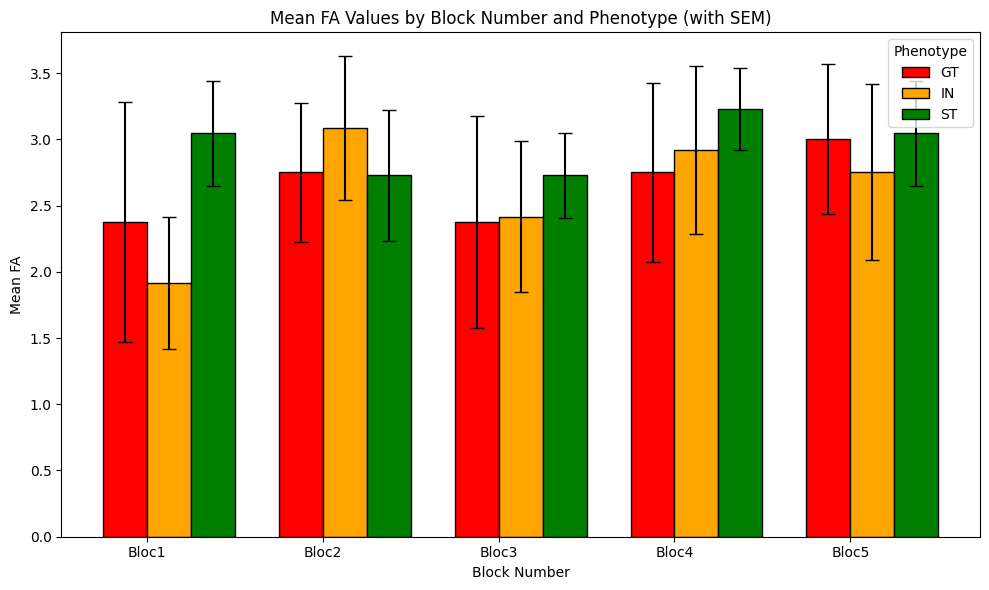

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the standard error of the mean (SEM) for the FA values
sem_fa_df = df_anova_fa.groupby(['Block_Number', 'Phenotype']).agg(
    mean_FA=('FA', 'mean'),
    sem_FA=('FA', lambda x: x.std() / (len(x)**0.5))
).reset_index()

# Define the width for each bar
bar_width = 0.25

# Get the unique block numbers and the positions for the bars
block_numbers = sem_fa_df['Block_Number'].unique()
block_pos = np.arange(len(block_numbers))

# Define the colors for each phenotype
color_map = {'ST': 'green', 'GT': 'red', 'IN': 'orange'}

# Plot the bar chart with grouped bars and error bars representing SEM for FA
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each phenotype group side by side with their respective error bars
for i, phenotype in enumerate(sem_fa_df['Phenotype'].unique()):
    phenotype_data = sem_fa_df[sem_fa_df['Phenotype'] == phenotype]
    ax.bar(
        block_pos + i * bar_width,
        phenotype_data['mean_FA'],
        yerr=phenotype_data['sem_FA'],
        width=bar_width,
        label=phenotype,
        color=color_map[phenotype],
        capsize=5,
        edgecolor='black'
    )

# Customize the plot
ax.set_title('Mean FA Values by Block Number and Phenotype (with SEM)')
ax.set_xlabel('Block Number')
ax.set_ylabel('Mean FA')
ax.set_xticks(block_pos + bar_width / 2)
ax.set_xticklabels(block_numbers)
ax.legend(title='Phenotype')
plt.tight_layout()

# Show the plot
plt.show()


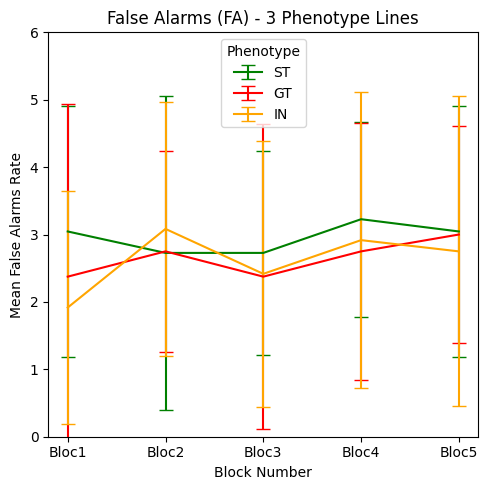

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the spreadsheet
file_path = 'SAT7HL.xlsx'
xls = pd.ExcelFile(file_path)

# Load the data from the 'tidy' sheet
tidy_df = pd.read_excel(xls, sheet_name='tidy')

# Filter out NaN in 'FA' as we are focusing on that metric
tidy_filtered_fa = tidy_df.dropna(subset=['FA'])

# Get unique phenotypes
phenotypes = tidy_filtered_fa['Phenotype'].unique()

# Define colors for phenotypes
phenotype_colors = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Group by Block_Number and Phenotype, then calculate mean and std for FA
grouped_data_fa = tidy_filtered_fa.groupby(['Block_Number', 'Phenotype']).agg(
    mean_fa=('FA', 'mean'),
    std_fa=('FA', 'std')
).reset_index()

# Set the figure for a single plot for 'FA'
plt.figure(figsize=(5, 5))

# Plot each phenotype for FA
for phenotype in phenotypes:
    data = grouped_data_fa[grouped_data_fa['Phenotype'] == phenotype]
    plt.errorbar(data['Block_Number'], data['mean_fa'], yerr=data['std_fa'], 
                 label=phenotype, color=phenotype_colors[phenotype], capsize=5)

plt.title('False Alarms (FA) - 3 Phenotype Lines')
plt.xlabel('Block Number')
plt.ylabel('Mean False Alarms Rate')
plt.ylim(0, 6)
plt.legend(title='Phenotype')

plt.tight_layout()
plt.show()
